# Data Modeling - XGboost
## Chirag

## Some more data post-processing

In [33]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import pickle
dirPath = 'dataset_diabetes/'


(100111, 43)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a7298d0>]],
      dtype=object)

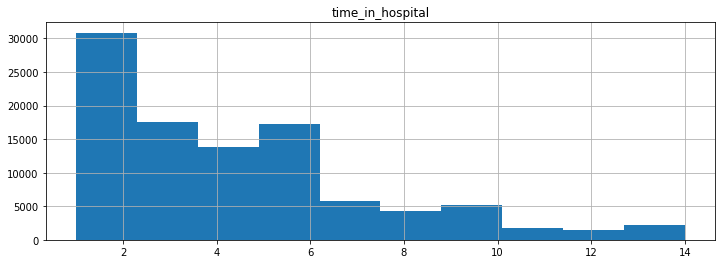

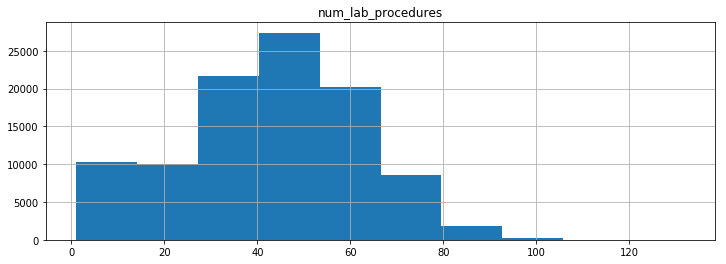

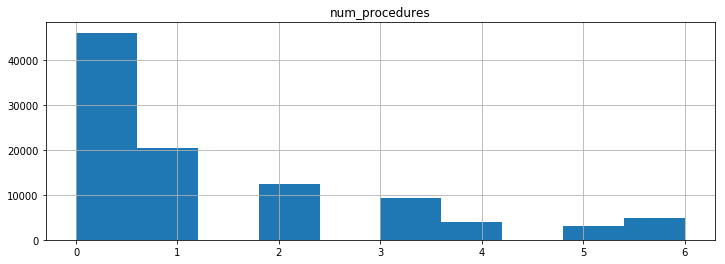

In [34]:
df = pd.read_csv(dirPath + "dataCategorizedNew.csv", index_col=0)
print(df.shape)

#https://www.analyticsvidhya.com/blog/2015/11/8-ways-deal-continuous-variables-predictive-modeling/
# To deal with them we need to either normalize them, or perform log transformation.

# We have continuous variables in our data.
# these columns has nice distribution so we will just apply normalization
# which are time_in_hospital, num_lab_procedures, num_procedures.
df.hist(column='time_in_hospital')
df.hist(column='num_lab_procedures')
df.hist(column='num_procedures')
# df['time_in_hospital_norm'] = Normalizer().fit_transform(df[['time_in_hospital']])
# df['num_lab_procedures_norm'] = Normalizer().fit_transform(df[['num_lab_procedures']])
# df['num_procedures_norm'] = Normalizer().fit_transform(df[['num_procedures']])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a34effac8>]],
      dtype=object)

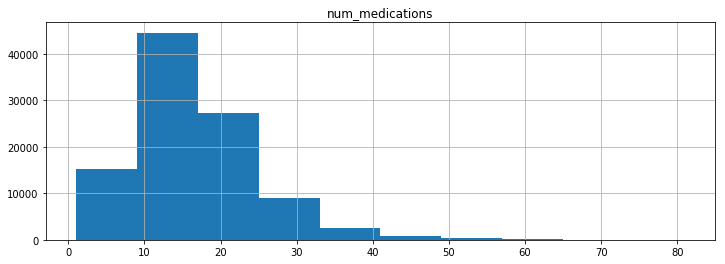

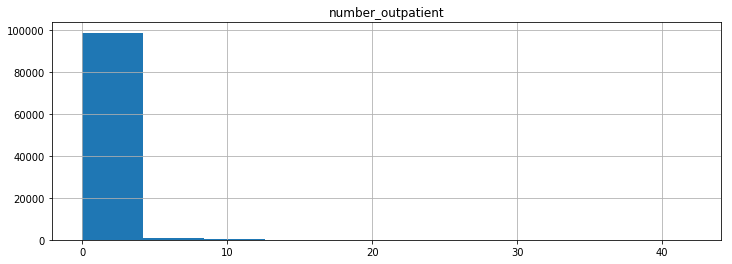

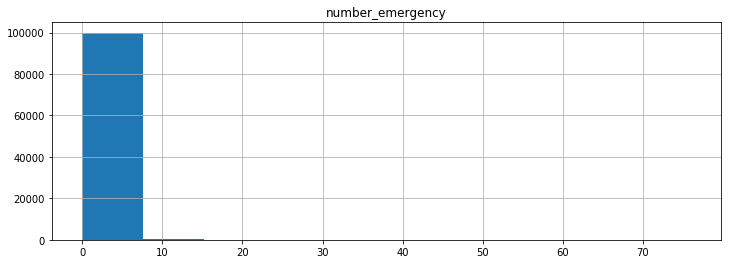

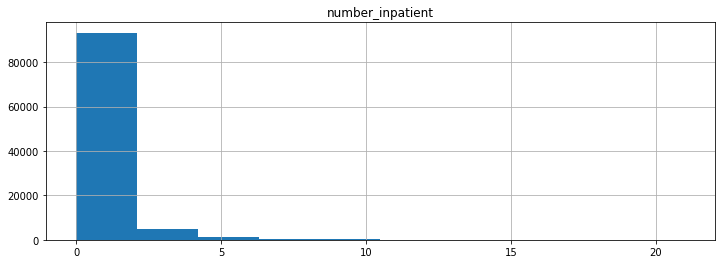

In [35]:
# Since these columns are skewed, we will perform log transformation for these columns 
# num_medications, number_outpatient, number_emergency, number_inpatient
df.hist(column='num_medications')
df.hist(column='number_outpatient')
df.hist(column='number_emergency')
df.hist(column='number_inpatient')



In [36]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,3,0,4,5,25,1,1,41,0,1,...,1,1,1,1,1,1,1,1,0,0
1,3,0,14,1,1,7,3,59,0,18,...,1,3,1,1,1,1,1,0,1,1
2,1,0,24,1,1,7,2,11,5,13,...,1,1,1,1,1,1,1,1,1,0
3,3,1,34,1,1,7,2,44,1,16,...,1,3,1,1,1,1,1,0,1,0
4,3,1,44,1,1,7,1,51,0,8,...,1,2,1,1,1,1,1,0,1,0
5,3,1,54,1,1,1,3,31,6,16,...,1,2,1,1,1,1,1,1,1,1
6,3,1,64,3,1,1,4,70,1,21,...,1,2,1,1,1,1,1,0,1,0
7,3,1,74,1,1,7,5,73,0,12,...,1,1,1,1,1,1,1,1,1,1
8,3,0,84,1,1,4,13,68,2,28,...,1,2,1,1,1,1,1,0,1,0
9,3,0,94,3,3,4,12,33,3,18,...,1,2,1,1,1,1,1,0,1,0


In [37]:
def postprocessing(df):
    
    #combining the inpatient , outpatient and emergency since we are interested in total times patient went to the hospital
    df['times_hospital_visited'] =  df['number_inpatient'] + df['number_outpatient'] + df['number_emergency']
    df = df.drop(['number_outpatient', 'number_emergency', 'number_inpatient'], axis=1)

    # # applying log transformation for the continuous variables
    # removing it since I don't know how to apply on query data

    # df["times_hospital_visited_log1p"] = np.log1p(df['times_hospital_visited'])
    # df["time_in_hospital_log1p"] = np.log1p(df['time_in_hospital'])
    # df["num_procedures_log1p"] = np.log1p(df['num_procedures'])
    # df["num_lab_procedures_log1p"] = np.log1p(df['num_lab_procedures'])
    # df["num_medications_log1p"] = np.log1p(df['num_medications'])
    # df = df.drop(['times_hospital_visited', 'time_in_hospital', 'num_procedures', 'num_lab_procedures', 'num_medications'], axis=1)

    #one hot encoding

    df_pd = pd.get_dummies(df, columns=['race', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                                    'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone'], drop_first = True)
    return df_pd

In [38]:
df_pd = postprocessing(df)
Preprocessed_df_y = df_pd['readmitted']
Preprocessed_df_x = df_pd.drop(['readmitted'], axis=1)

In [39]:
Preprocessed_df_x

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,...,insulin_1,insulin_2,insulin_3,glyburide-metformin_1,glyburide-metformin_2,glyburide-metformin_3,glipizide-metformin_2,glimepiride-pioglitazone_2,metformin-rosiglitazone_2,metformin-pioglitazone_2
0,0,4,1,41,0,1,3.0,-1.0,-1.0,1,...,1,0,0,1,0,0,0,0,0,0
1,0,14,3,59,0,18,3.0,3.0,3.0,9,...,0,0,1,1,0,0,0,0,0,0
2,0,24,2,11,5,13,11.0,3.0,0.0,6,...,1,0,0,1,0,0,0,0,0,0
3,1,34,2,44,1,16,1.0,3.0,7.0,7,...,0,0,1,1,0,0,0,0,0,0
4,1,44,1,51,0,8,2.0,2.0,3.0,5,...,0,1,0,1,0,0,0,0,0,0
5,1,54,3,31,6,16,7.0,7.0,3.0,9,...,0,1,0,1,0,0,0,0,0,0
6,1,64,4,70,1,21,7.0,7.0,0.0,7,...,0,1,0,1,0,0,0,0,0,0
7,1,74,5,73,0,12,7.0,8.0,3.0,8,...,1,0,0,1,0,0,0,0,0,0
8,0,84,13,68,2,28,7.0,7.0,1.0,8,...,0,1,0,1,0,0,0,0,0,0
9,0,94,12,33,3,18,7.0,2.0,8.0,8,...,0,1,0,1,0,0,0,0,0,0


## MODELING & ANALYSIS

In [40]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,accuracy_score
from xgboost import plot_importance
from matplotlib import pyplot
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

X_train, X_test, Y_train, Y_test = train_test_split(Preprocessed_df_x, Preprocessed_df_y, test_size=0.20, random_state=80)


In [41]:

def modelfit(alg, X_train, X_test, Y_train, Y_test,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, Y_train)
        xgtest = xgb.DMatrix(X_test)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        print(cvresult.shape)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train, Y_train, eval_metric='auc')
        
    Y_predict = alg.predict(X_test)
    print("F1 Score (Test)")
    print(f1_score(Y_test, Y_predict, average='macro'))
    plot_importance(alg)
    pyplot.show()

(319, 4)


/Users/carora/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


F1 Score (Test)
0.6420038875019716


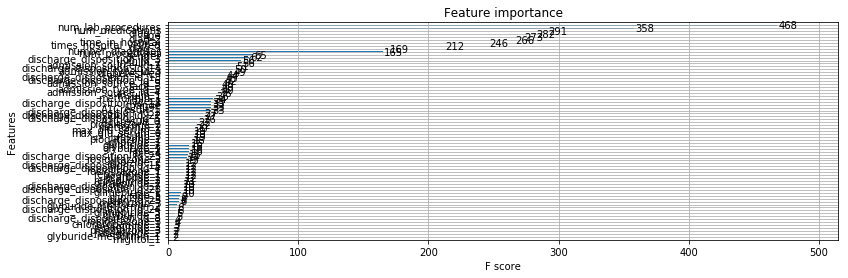

In [42]:

xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, X_train, X_test, Y_train, Y_test)
filename = 'finalized_model.sav'
pickle.dump(xgb3, open(dirPath + filename, 'wb'))


########################## UNTIL HERE, WE JUST BUILD AND SAVE THE MODEL. DO NOT GO FURTHER, UNLESS YOU WANT TO 
###### TUNE THE PARAMETERS. THE ABOVE MENTIONED PARAMETERS ARE TUNED AND WERE FOUND AFTER 8 HOURS OF ANALYSIS 


(334, 4)


/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


F1 Score (Test)
0.6383888282762091


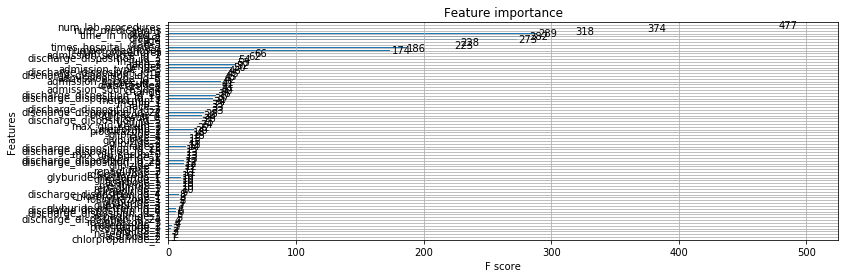

/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6383888282762091
0.6432602507116816
(345, 4)


/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


F1 Score (Test)
0.6389623222207124


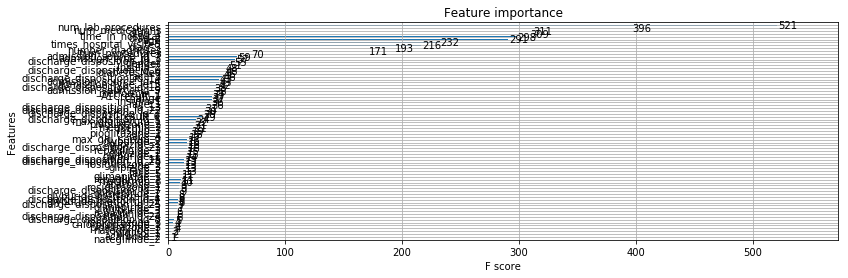

(290, 4)


/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


F1 Score (Test)
0.6396645415813713


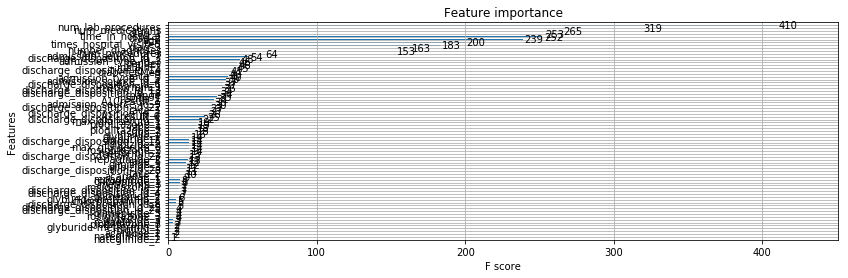

In [32]:
################### PARAMETER TUNING #############################
### analysis = False means, don't find parameter tuning. It takes ALOT of time.
analysis = False


gbm = xgb.XGBClassifier( learning_rate = 0.1, n_estimators=1000, max_depth=4,
     min_child_weight=6, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
     objective= 'binary:logistic',reg_alpha=0.005, nthread=4, scale_pos_weight=1,seed=27)
modelfit(gbm, X_train, X_test, Y_train, Y_test)

gbm = gbm.fit(X_train, Y_train)
Y_predict = gbm.predict(X_test)
print(f1_score(Y_test, Y_predict, average='macro'))
print(accuracy_score(Y_test, Y_predict))
# plot_importance(gbm)
# pyplot.show()
# filename = 'finalized_model.sav'
# pickle.dump(gbm, open(dirPath + filename, 'wb'))

xgb2 = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=4,
     min_child_weight=6, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
     objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
modelfit(xgb2, X_train, X_test, Y_train, Y_test)
# gbm = gbm.fit(X_train, Y_train)
# Y_predict = gbm.predict(X_test)

# print(f1_score(Y_test, Y_predict, average='macro'))
# print(accuracy_score(Y_test, Y_predict))

xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, X_train, X_test, Y_train, Y_test)



In [18]:

param_test = {
    'max_depth':[i for i in range(3, 6)],
    'gamma':[i/10.0 for i in range(0,3)],
    'learning_rate':[i/10.0 for i in range(1,4)]
}

grid = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5,
                                        min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        reg_alpha=0.005,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test, scoring='f1_macro',n_jobs=4, cv=5)

grid.fit(X_train, Y_train)
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)
print("best score info")
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

# xgb1 = XGBClassifier(
#         learning_rate =0.1,
#         n_estimators=1000,
#         max_depth=5,
#         min_child_weight=1,
#         gamma=0,
#         subsample=0.8,
#         colsample_bytree=0.8,
#         objective= 'binary:logistic',
#         nthread=4,
#         scale_pos_weight=1,
#         seed=27)
# modelfit(xgb1, X_train, X_test, Y_train, Y_test)



/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.s

/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning

/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning

/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning

/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning

[0.6306449127283261, 0.629445095273063, 0.6254698512238476, 0.6276729783536373, 0.6232935209856086, 0.6156973431640088, 0.6253285103546239, 0.6180992150408763, 0.6102937336502265, 0.6297265586874734, 0.6298579424076772, 0.626303357547918, 0.6286463119588563, 0.6234696964201735, 0.6185306241204168, 0.6248337474303252, 0.6176884745075025, 0.6089468887200836, 0.6309519648001759, 0.62954818192113, 0.6252596203529251, 0.628827168107274, 0.6227167942279141, 0.6172141730992832, 0.6251859878841663, 0.6179388162457882, 0.6098162748058356]
best score info
0.6309519648001759
{'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.2, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0.005, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=Tru

[mean: 0.68450, std: 0.00068, params: {'gamma': 0.0}, mean: 0.68460, std: 0.00076, params: {'gamma': 0.1}, mean: 0.68472, std: 0.00066, params: {'gamma': 0.2}, mean: 0.68448, std: 0.00091, params: {'gamma': 0.3}, mean: 0.68455, std: 0.00067, params: {'gamma': 0.4}] {'gamma': 0.2} 0.6847155598220904


/Users/carora/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


F1 Score (Test)
0.6389281982675267


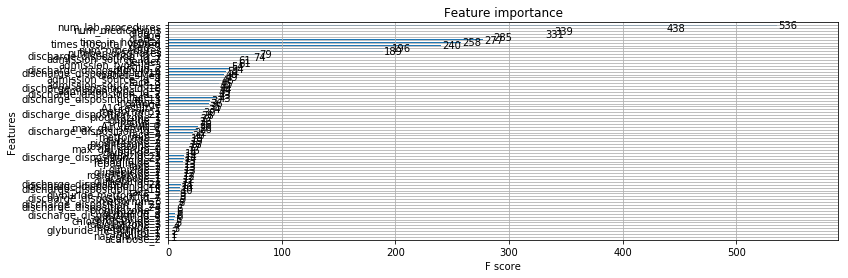

In [14]:

if (analysis):
    param_test3 = {
     'gamma':[i/10.0 for i in range(0,5)]
    }
    gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=4,
     min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
     objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
     param_grid = param_test3, scoring='f1_macro',n_jobs=4, iid=False, cv=5)
    gsearch3.fit(X_train, Y_train)
    print(gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_)


    xgb2 = XGBClassifier(
     learning_rate =0.1,
     n_estimators=1000,
     max_depth=4,
     min_child_weight=6,
     gamma=0,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=4,
     scale_pos_weight=1,
     seed=27)
    modelfit(xgb2, X_train, X_test, Y_train, Y_test)


/Users/carora/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


F1 Score (Test)
0.6420038875019716


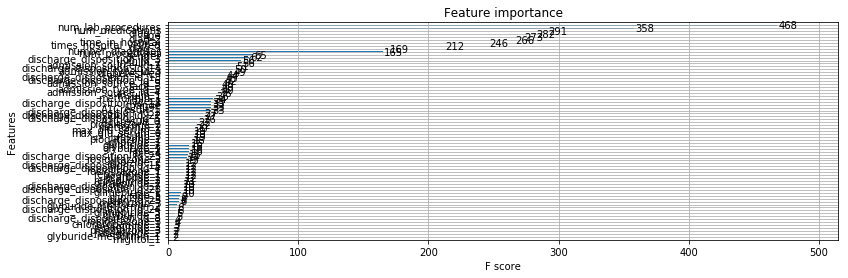

In [15]:
if (analysis):
    xgb3 = XGBClassifier(
     learning_rate =0.1,
     n_estimators=1000,
     max_depth=4,
     min_child_weight=6,
     gamma=0,
     subsample=0.8,
     colsample_bytree=0.8,
     reg_alpha=0.005,
     objective= 'binary:logistic',
     nthread=4,
     scale_pos_weight=1,
     seed=27)
    modelfit(xgb3, X_train, X_test, Y_train, Y_test)
